Saving Mall_Customers.csv to Mall_Customers.csv

--- First 5 rows of dataset ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dty

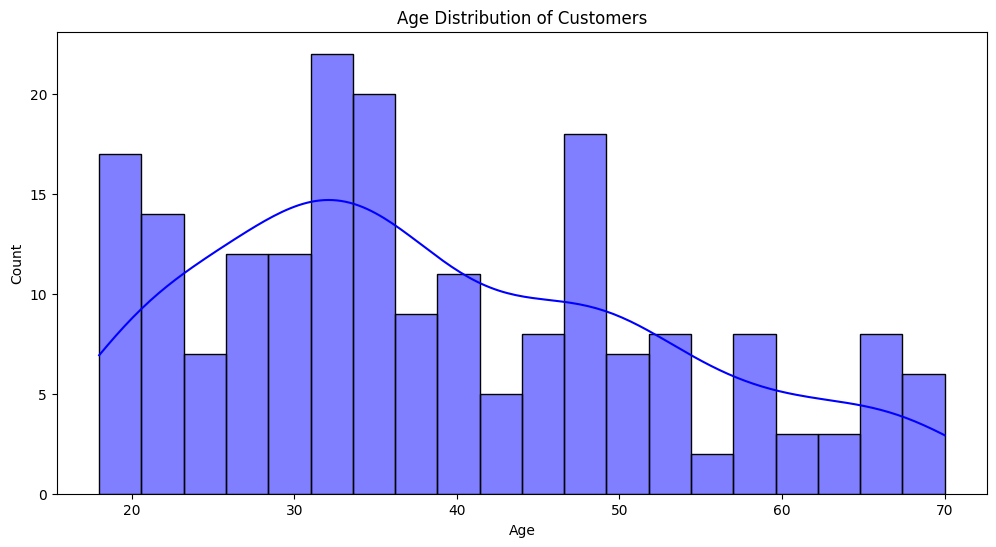

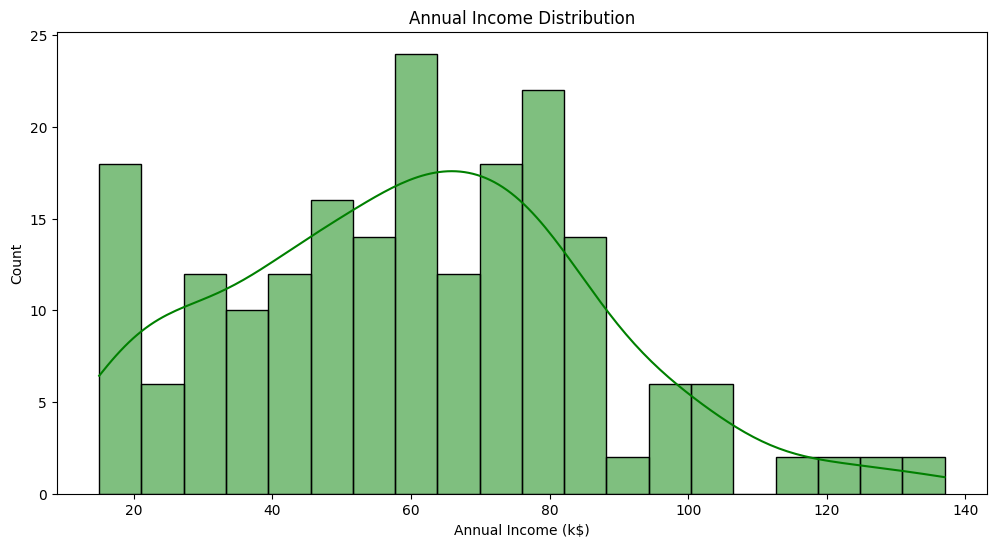

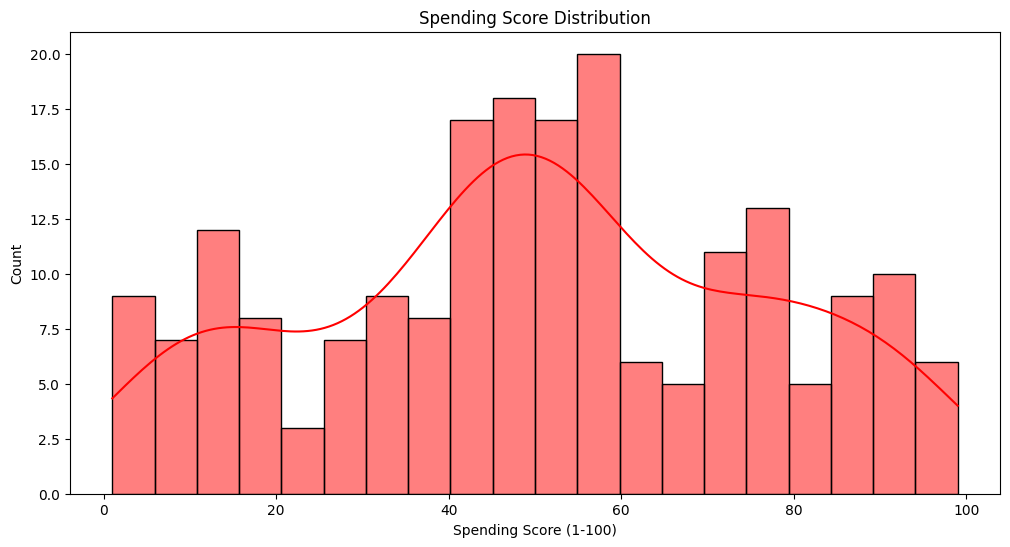

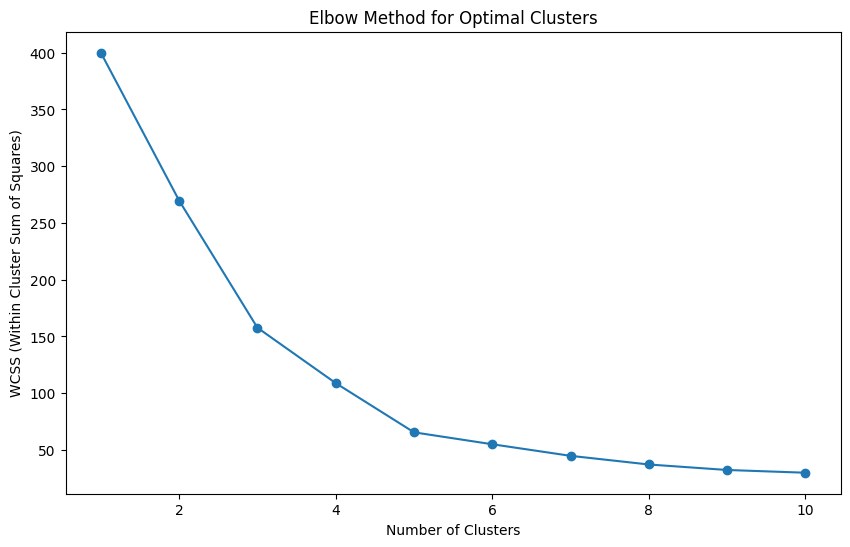


--- Clustered Data Sample ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


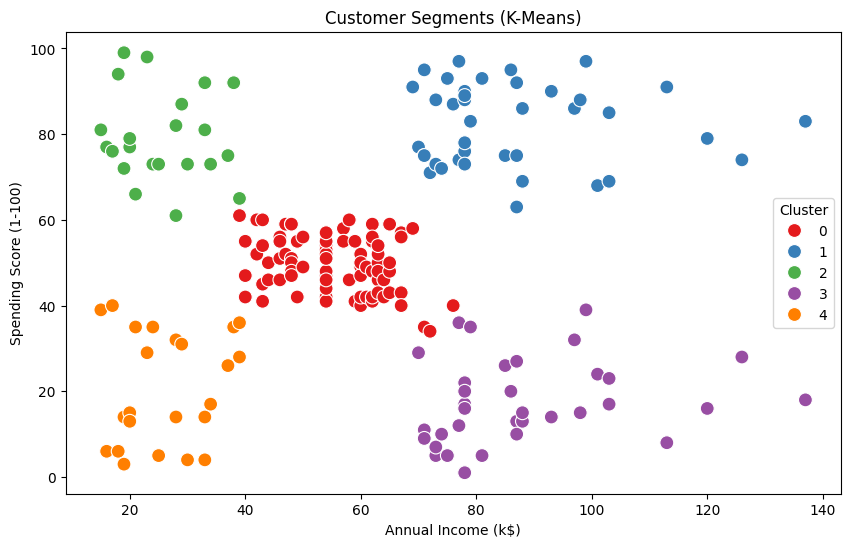

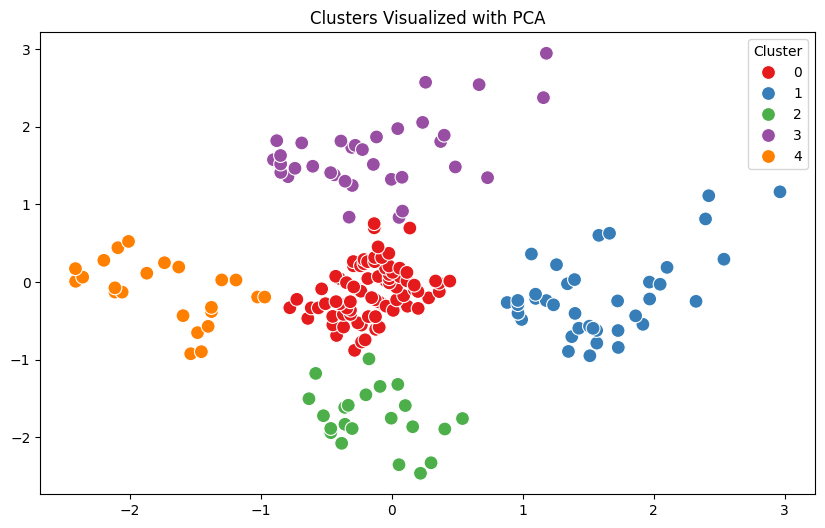

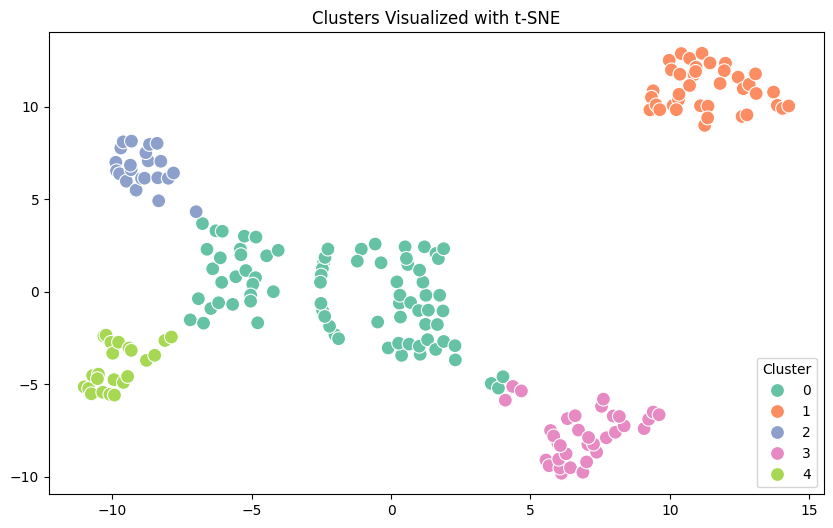


--- Cluster Summary ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043

--- Suggested Marketing Strategies ---

Cluster 0: (High income, high spenders) → Target with luxury products, VIP loyalty programs.
Cluster 1: (Low income, low spenders) → Offer discounts, budget-friendly bundles.
Cluster 2: (Young, medium income, high spenders) → Promote trendy/fashionable items, social media campaigns.
Cluster 3: (High income, low spenders) → Upsell premium services, targeted promotions to increase spending.
Cluster 4: (Average income, average spenders) → General marketing campaigns, seasonal promotions.



In [ ]:
# Task 2: Customer Segmentation Using Unsupervised Learning

# -----------------------------
# STEP 1: Import libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# -----------------------------
# STEP 2: Load Dataset
# -----------------------------
# Upload dataset (Mall_Customers.csv) from your files
from google.colab import files
uploaded = files.upload()

# Read dataset
df = pd.read_csv("Mall_Customers.csv")

# -----------------------------
# STEP 3: Exploratory Data Analysis (EDA)
# -----------------------------
print("\n--- First 5 rows of dataset ---")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
print(df.describe())

# Visualize distributions
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color="red")
plt.title("Spending Score Distribution")
plt.show()

# -----------------------------
# STEP 4: Feature Selection
# -----------------------------
# We'll use Annual Income and Spending Score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# STEP 5: K-Means Clustering
# -----------------------------
# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# From elbow curve, choose k=5 (common for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\n--- Clustered Data Sample ---")
print(df.head())

# -----------------------------
# STEP 6: Visualize Clusters
# -----------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1", s=100)
plt.title("Customer Segments (K-Means)")
plt.show()

# -----------------------------
# STEP 7: Dimensionality Reduction
# -----------------------------
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set1", s=100)
plt.title("Clusters Visualized with PCA")
plt.show()

# t-SNE for advanced visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Cluster'], palette="Set2", s=100)
plt.title("Clusters Visualized with t-SNE")
plt.show()

# -----------------------------
# STEP 8: Marketing Strategy Suggestions
# -----------------------------
# Analyze each cluster
cluster_summary = df.groupby("Cluster")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print("\n--- Cluster Summary ---")
print(cluster_summary)

print("\n--- Suggested Marketing Strategies ---")
print("""
Cluster 0: (High income, high spenders) → Target with luxury products, VIP loyalty programs.
Cluster 1: (Low income, low spenders) → Offer discounts, budget-friendly bundles.
Cluster 2: (Young, medium income, high spenders) → Promote trendy/fashionable items, social media campaigns.
Cluster 3: (High income, low spenders) → Upsell premium services, targeted promotions to increase spending.
Cluster 4: (Average income, average spenders) → General marketing campaigns, seasonal promotions.
""")
